In [97]:
#Importing libraries
import pandas as pd
import os
import json
import csv
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import PercentFormatter

In [98]:
#Importing the generic functions created
import sys
sys.path.append('../src/utils/')
from eda import calculate_mode, plot_attribute_counts_bad_rate_count_type

In [99]:
bad_officer_appointments = '../data/bad_officer_appointments.csv'
good_officer_appointments = '../data/good_officer_appointments.csv'
officer_information_directory = '../data/officer_attribute_store/'

# First let's get the data we need. 

Here we are collecting the officer number and their child - parent relationship of one of their appointmnets

In [100]:
def extract_parent_child_data(csv_file_path, json_directory):
    officer_appointments = pd.read_csv(csv_file_path)

    unique_officer_numbers = officer_appointments['officer_number'].unique()
    matched_officer_data = []

    for officer_number in unique_officer_numbers:
        json_file_path = os.path.join(json_directory, officer_number + '.json')

        if not os.path.isfile(json_file_path):
            continue

        with open(json_file_path, 'r') as file:
            json_data = json.load(file)

        if 'parent_child' in json_data:
            other_parent_child = json_data['parent_child']

            for company_number, parent_child_list in other_parent_child.items():
                if parent_child_list is not None:
                    for parent_child_info in parent_child_list:
                        child = parent_child_info.get('child')
                        parent = parent_child_info.get('parent')
                        degree_of_separation = parent_child_info.get('degree_of_separation')
                        is_ultimate_parent = parent_child_info.get('is_ultimate_parent')
                        company_is_parent = parent_child_info.get('company_is_parent')

                        matched_officer_data.append((
                            officer_number,
                            company_number,
                            child,
                            parent,
                            degree_of_separation,
                            is_ultimate_parent,
                            company_is_parent
                        ))

    return pd.DataFrame(matched_officer_data, columns=['officer_number', 'company_number', 'child', 'parent', 'degree_of_separation', 'is_ultimate_parent', 'company_is_parent'])


In [101]:
good_parent_child_data = extract_parent_child_data(good_officer_appointments,officer_information_directory)
bad_parent_child_data = extract_parent_child_data(bad_officer_appointments,officer_information_directory)


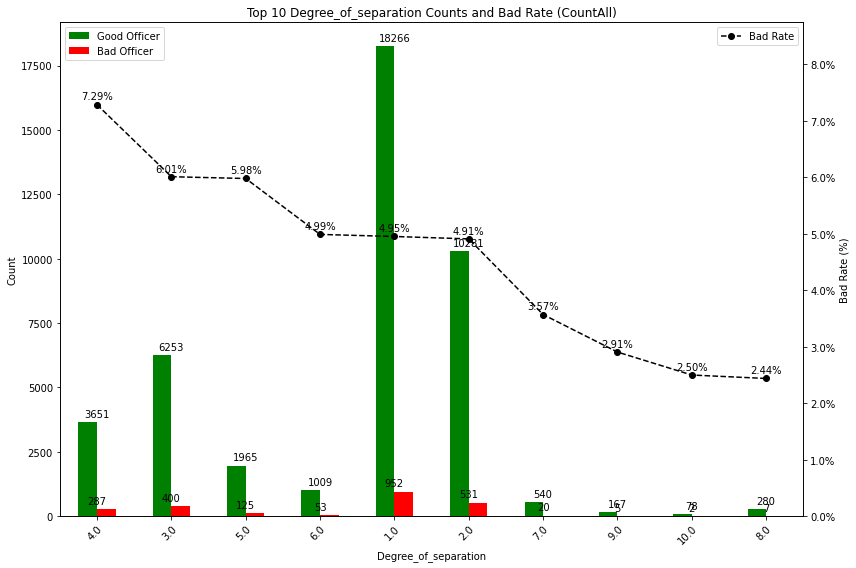

In [102]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'degree_of_separation', count_type='count_all')


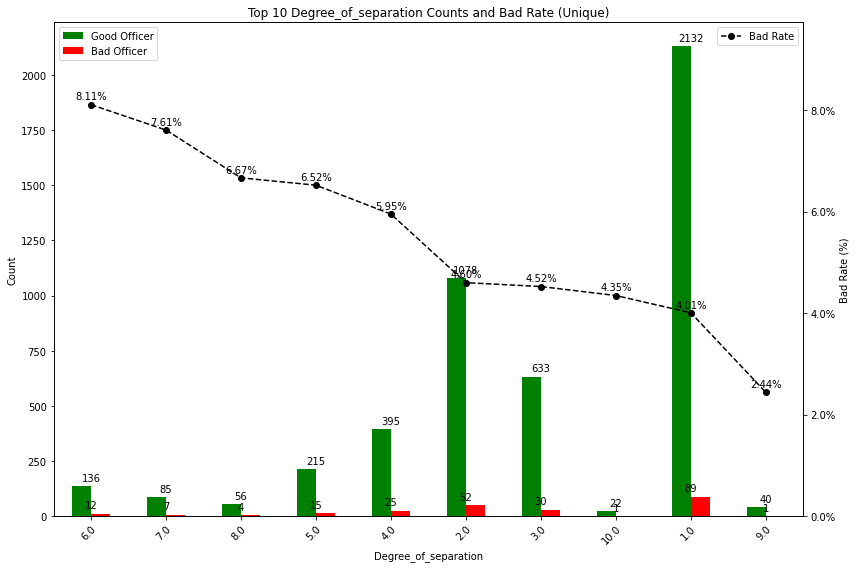

In [103]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'degree_of_separation', count_type='unique')


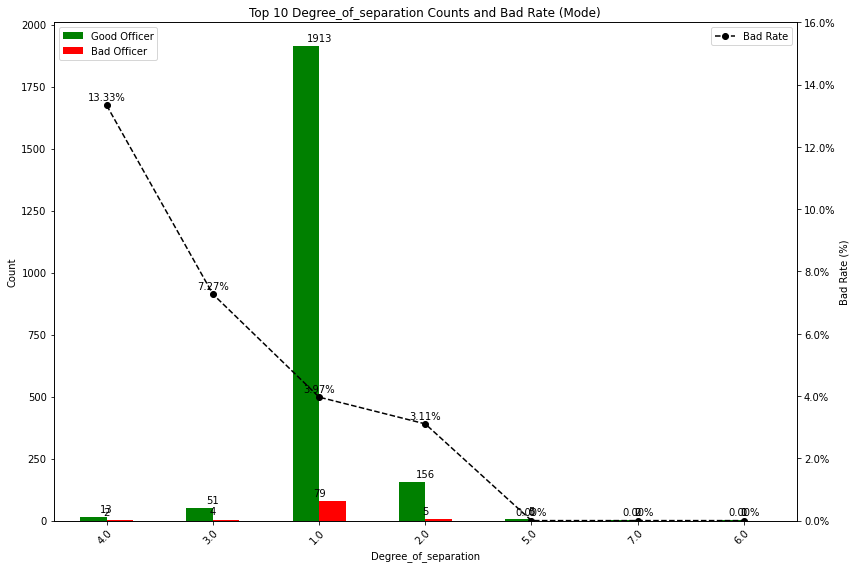

In [104]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'degree_of_separation', count_type='mode')


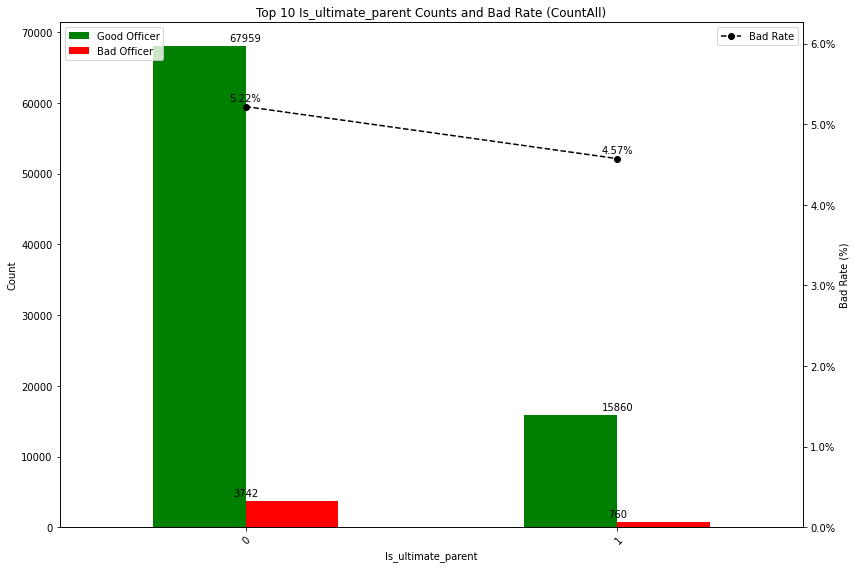

In [105]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'is_ultimate_parent', count_type='count_all')


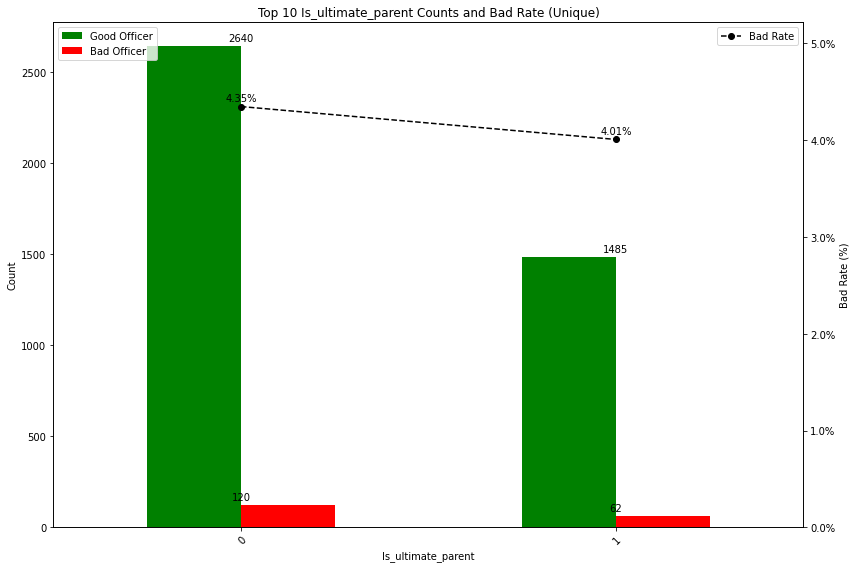

In [106]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'is_ultimate_parent', count_type='unique')


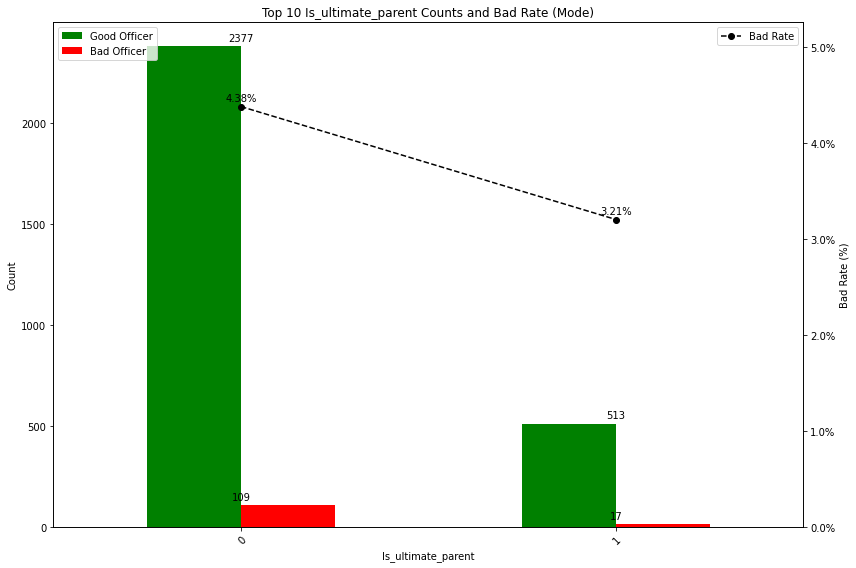

In [109]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'is_ultimate_parent', count_type='mode')


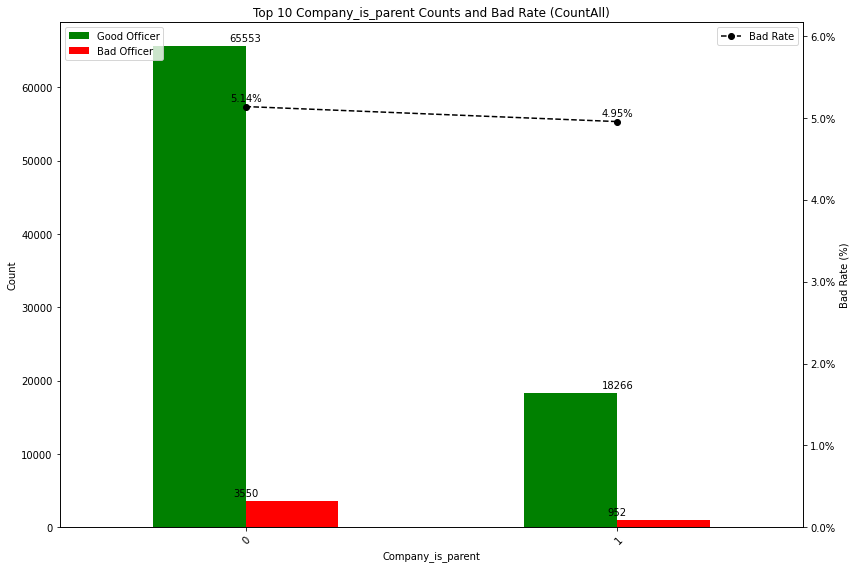

In [113]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'company_is_parent', count_type='count_all')


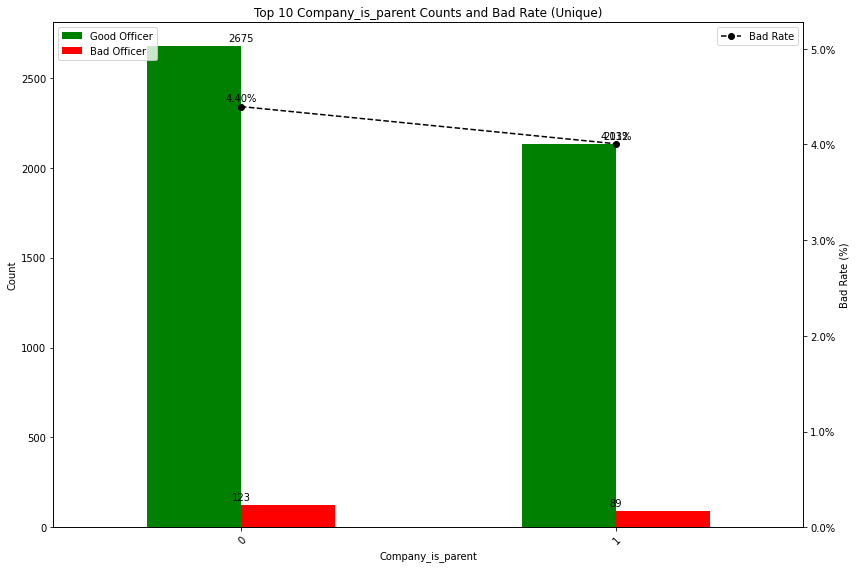

In [114]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'company_is_parent', count_type='unique')


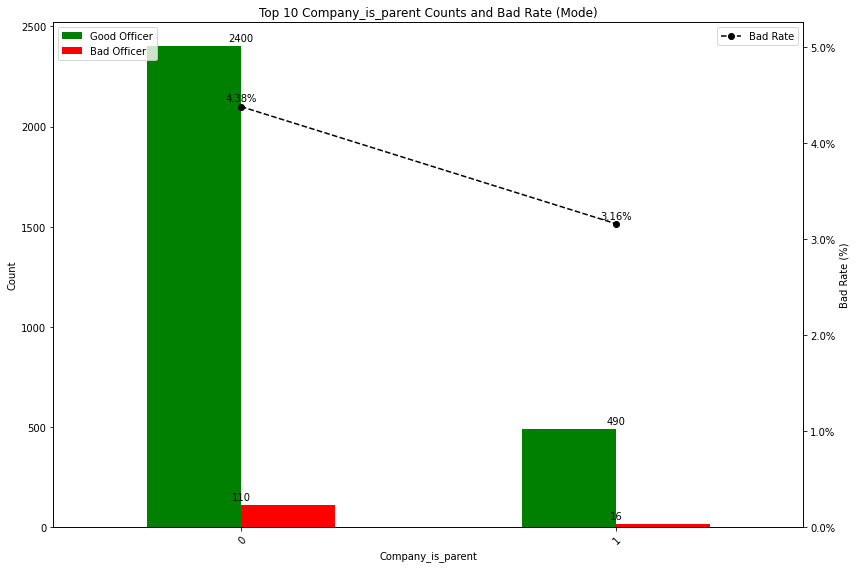

In [115]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'company_is_parent', count_type='mode')


/Users/alexfokas/repos/modelling/non-payment-officer-network-model/notebooks/../src/utils/eda.py:69: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax2.set_ylim(0, max_bad_rate * 1.2)


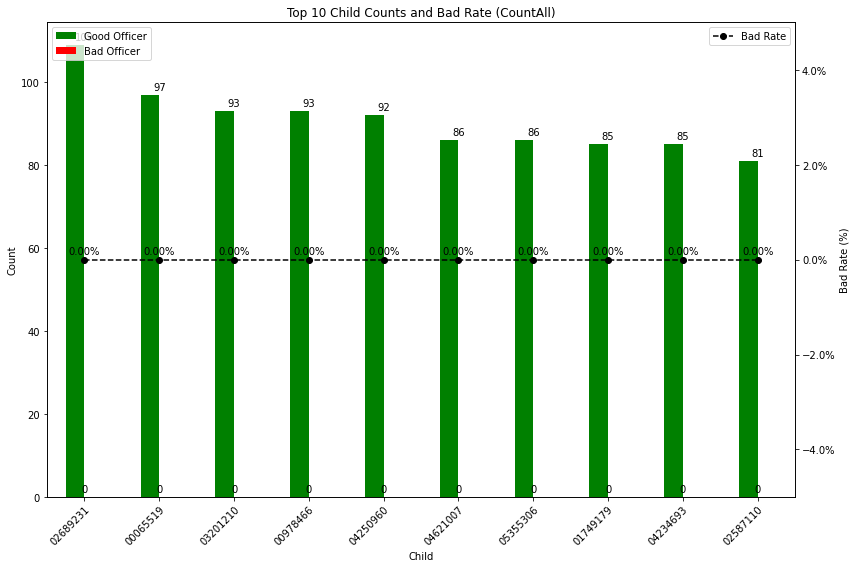

In [135]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'child', count_type='count_all')


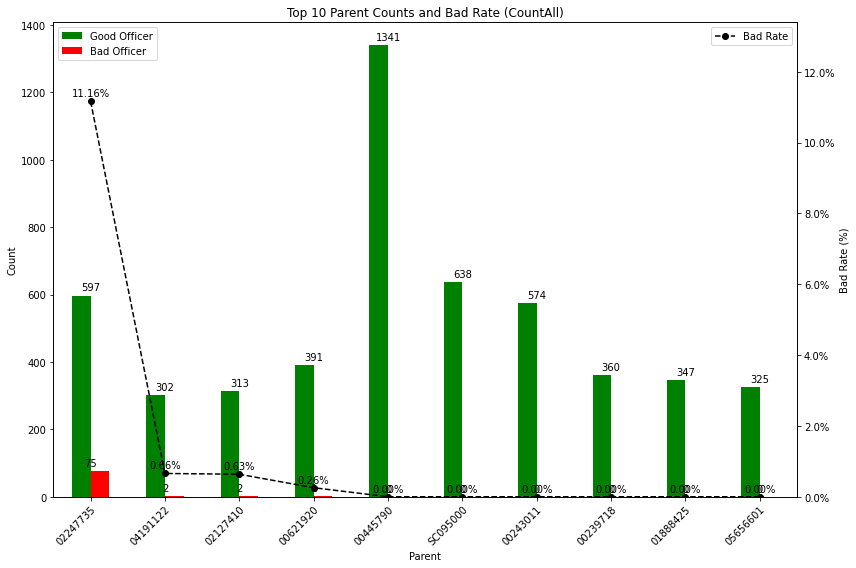

In [21]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_data, bad_parent_child_data, 'parent', count_type='count_all')


# The counts look off, let's try and sumarise each officer by taking the first X parents, etc. 


In [136]:
good_parent_child_data.groupby('officer_number').company_number.count().sort_values(ascending=False)


officer_number
8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b    1005
732f2a4a029a13521ae9b071203bc6ea05200404     759
be8f1556b0d31f641d173c4991550673a354f533     648
10cd57918ec6c154b9d189366e767c6f7a1c0b50     558
b536f2aba409e8a13f9f6bcaaf4337b32708ff8c     536
                                            ... 
c5f77298db030232c4fc834242ddd3b7be1de009       1
5434a482596d5211c985bb83d24a9e1ce912c783       1
7533bff34866f47b02041acb4078e4a7e1585887       1
243d6faa8b8383308f3e59d39d60112f3a2516f7       1
8002c16151936dd5dbaaab2db5f213a1ca5a523d       1
Name: company_number, Length: 2890, dtype: int64

In [139]:
good_parent_child_data[(good_parent_child_data.officer_number=='8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b') & (good_parent_child_data.company_number=='03299793') & (good_parent_child_data.parent=='03299793')]



,officer_number,company_number,child,parent,degree_of_separation,is_ultimate_parent,company_is_parent
23088,8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b,03299793,03989280,03299793,1.0,0,1
23089,8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b,03299793,00113415,03299793,2.0,0,0
23090,8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b,03299793,02287671,03299793,2.0,0,0
23091,8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b,03299793,11855930,03299793,1.0,0,1


In [119]:
good_parent_child_take_first = good_parent_child_data.copy(deep=True)
bad_parent_child_data_take_first = bad_parent_child_data.copy(deep=True)


In [120]:
good_parent_child_take_first[good_parent_child_take_first.child != good_parent_child_take_first.parent]

,officer_number,company_number,child,parent,degree_of_separation,is_ultimate_parent,company_is_parent
0,d697fbec8d6d9178190c161ee31cbd1263a0fcd6,03003332,00628866,03003332,1.0,1,1
1,36a584f26bc83e27c8cf16ea411e03df2eff77cd,00071215,00071215,03341930,NaN,0,0
2,36a584f26bc83e27c8cf16ea411e03df2eff77cd,03341930,00071215,03341930,1.0,1,1
3,36a584f26bc83e27c8cf16ea411e03df2eff77cd,05755704,05755704,03642327,NaN,0,0
4,36a584f26bc83e27c8cf16ea411e03df2eff77cd,00080612,06469948,00080612,1.0,1,1
...,...,...,...,...,...,...,...
83814,e503bc84d0364295be57acea99fc5d2f121058ec,04067010,04067010,01372569,NaN,0,0
83815,e503bc84d0364295be57acea99fc5d2f121058ec,01274885,11732429,01274885,1.0,0,1
83816,e503bc84d0364295be57acea99fc5d2f121058ec,01274885,01274885,01372569,NaN,0,0
83817,e503bc84d0364295be57acea99fc5d2f121058ec,03006207,03006207,06923682,NaN,0,0


#### Ok let's only take a single example of either the company being a parent or not being a parent

In [121]:
# BUG 
bad_parent_child_take_first = bad_parent_child_data.copy(deep=True)
bad_parent_child_take_first = bad_parent_child_take_first[(bad_parent_child_take_first.child != bad_parent_child_take_first.parent)]
good_parent_child_take_first = good_parent_child_data.copy(deep=True)
good_parent_child_take_first = good_parent_child_take_first[(good_parent_child_take_first.child != good_parent_child_take_first.parent)]


In [131]:
bad_parent_child_take_first.drop_duplicates(subset=['officer_number', 'company_is_parent'], keep='first', inplace=True)
bad_parent_child_take_first[bad_parent_child_take_first.officer_number=='8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b']

good_parent_child_take_first.drop_duplicates(subset=['officer_number', 'company_is_parent'], keep='first', inplace=True)
good_parent_child_take_first[good_parent_child_take_first.officer_number=='8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b']


,officer_number,company_number,child,parent,degree_of_separation,is_ultimate_parent,company_is_parent
23088,8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b,03299793,03989280,03299793,1.0,0,1
23112,8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b,00621920,08791019,00621920,5.0,1,0


In [132]:
good_parent_child_take_first

,officer_number,company_number,child,parent,degree_of_separation,is_ultimate_parent,company_is_parent
0,d697fbec8d6d9178190c161ee31cbd1263a0fcd6,03003332,00628866,03003332,1.0,1,1
1,36a584f26bc83e27c8cf16ea411e03df2eff77cd,00071215,00071215,03341930,NaN,0,0
2,36a584f26bc83e27c8cf16ea411e03df2eff77cd,03341930,00071215,03341930,1.0,1,1
8,fa8d298299ac95e3cfc7046975d35c1260d2619f,00981301,00981301,02360038,NaN,0,0
9,283a6b4d752a126ce323ea1aee977668b416c45a,06214634,06214634,06214376,NaN,0,0
...,...,...,...,...,...,...,...
83578,0d3031b14774f4ac5c647e34daeb5dc7735058e7,02658144,02658144,10837649,NaN,0,0
83649,080db92f569140dba4d55aa7aacc87df5fd81f7e,NI609266,NI609266,NI010644,NaN,0,0
83650,d26d2452ab1c9e663dd1daedf56a74ccc058aacb,09121278,09121278,2b61de8c-7e93-47c9-b23d-b0ee9418d2ce,NaN,0,0
83804,55eb8917fa3df07f7c8acd2fa52c6760ffde5a94,02202838,02202838,34173812,NaN,0,0


## Now let's look at company_is_parent

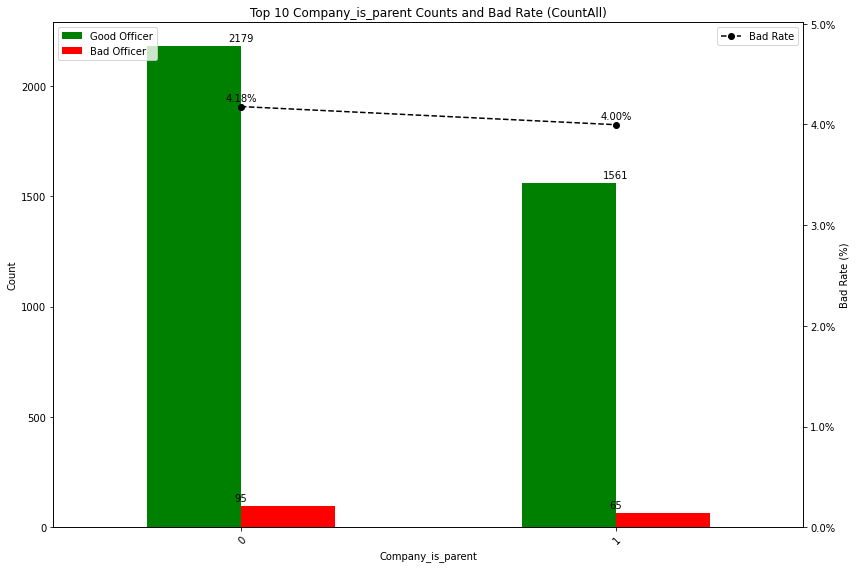

In [133]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_take_first, bad_parent_child_take_first, 'company_is_parent', count_type='count_all')


### OK, not a huge change, what about is_ultimate_parent

In [140]:
bad_parent_child_take_first = bad_parent_child_data.copy(deep=True)
bad_parent_child_take_first.drop_duplicates(subset=['officer_number', 'is_ultimate_parent'], keep='first', inplace=True)
bad_parent_child_take_first[bad_parent_child_take_first.officer_number=='8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b']

good_parent_child_take_first = good_parent_child_data.copy(deep=True)
good_parent_child_take_first.drop_duplicates(subset=['officer_number', 'is_ultimate_parent'], keep='first', inplace=True)
good_parent_child_take_first[good_parent_child_take_first.officer_number=='8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b']


,officer_number,company_number,child,parent,degree_of_separation,is_ultimate_parent,company_is_parent
23088,8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b,03299793,03989280,03299793,1.0,0,1
23112,8b60349b2c2d2ebd6f4fb73c05648f7ca2c3cf8b,00621920,08791019,00621920,5.0,1,0


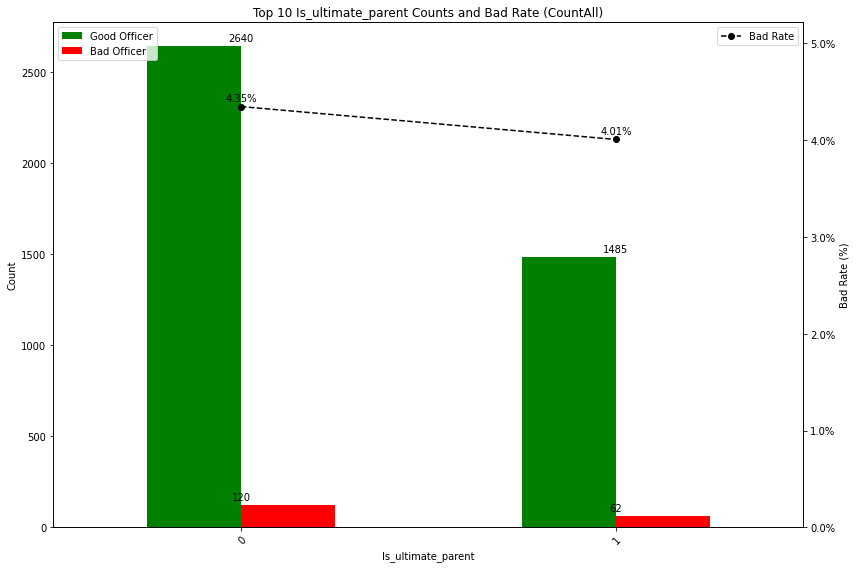

In [141]:
plot_attribute_counts_bad_rate_count_type(good_parent_child_take_first, bad_parent_child_take_first, 'is_ultimate_parent', count_type='count_all')
